In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Height', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
abalone = pd.read_csv("/content/abalone.data.csv", header=0, names = columns)

In [3]:
abalone.head()

,Sex,Length,Diameter,Height,Whole Height,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [4]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole Height    4176 non-null   float64
 5   Shucked Weight  4176 non-null   float64
 6   Viscera Weight  4176 non-null   float64
 7   Shell Weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
abalone.describe()

,Length,Diameter,Height,Whole Height,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


Age of the abalone can be measured by looking their rings. We can find abalones age by adding 1.5 to their number of rings. In example if abalone has 5 rings its age calculatyed as 5 + 1.5 = 6.5 years. Since, in our dataset we have number of rings abalone has, we could change rings column to age by adding all values to 1.5. Another approach is we could keep ring column as it is and after we made prediction we simply add 1.5. Since last method requires less computional power we will fallow last approach.

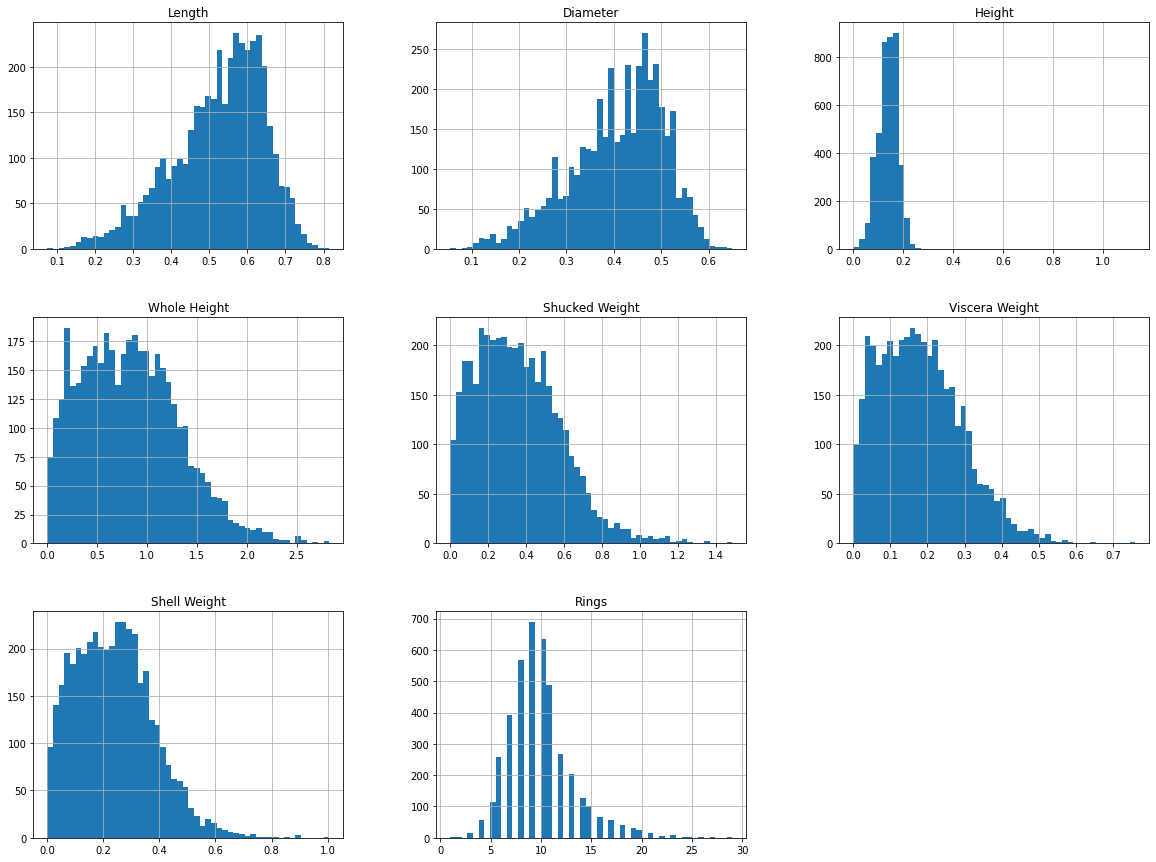

In [6]:
abalone.hist(bins=50,figsize=(20,15))
plt.show()

In [7]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Height      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

**Correlation between features and label**

Measuring correlation is a very important technique in the fields of data science and artifical intelligence. Before train our model we have to decide which feature we will use. In complex datasets we might have hundreds of columns which may not be usefull where performing model training. Correlation helps us to understand relations between features.  If correlation between feature and label is low, we might consider to not include in training data to improve models accuracy.

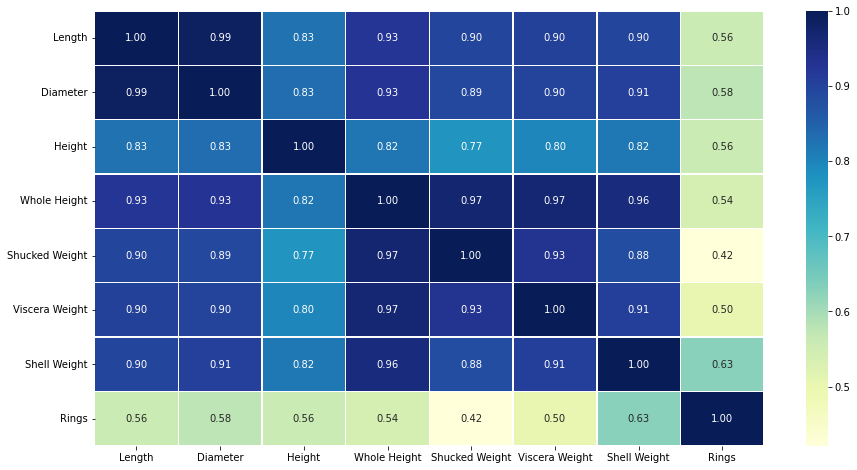

In [8]:
import seaborn as sns
from matplotlib import rcParams # For changing figure size

corr = abalone.corr()
rcParams['figure.figsize'] = 15,8 # set figure size here
sns.heatmap(corr, linewidths=.5, cmap = 'YlGnBu', annot = True, fmt='.2f')

**Handling Categorical value**

Before analyzing outliers first deal with categorical values. In our dataset we have 1 categorical value which is 'Sex' category. We will replace categorical values by numerical values.

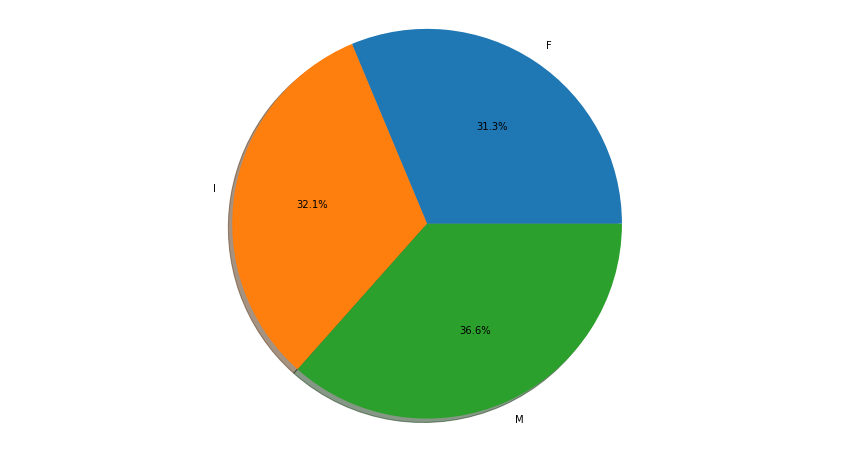

In [9]:
# Pie chart demonstration of the Sex column
labels = abalone['Sex'].astype('category').cat.categories.tolist()
counts =  abalone['Sex'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [10]:
replace_map = {'Sex': {'M':0, 'F':1, 'I':2} }

In [11]:
abalone_replace = abalone.copy()
abalone_replace.replace(replace_map, inplace=True)
abalone_replace.head()

,Sex,Length,Diameter,Height,Whole Height,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


**Detecting Outliers** 

For detecting outliers we can use IQR (interquartile range) method and visualization we can use boxplots.

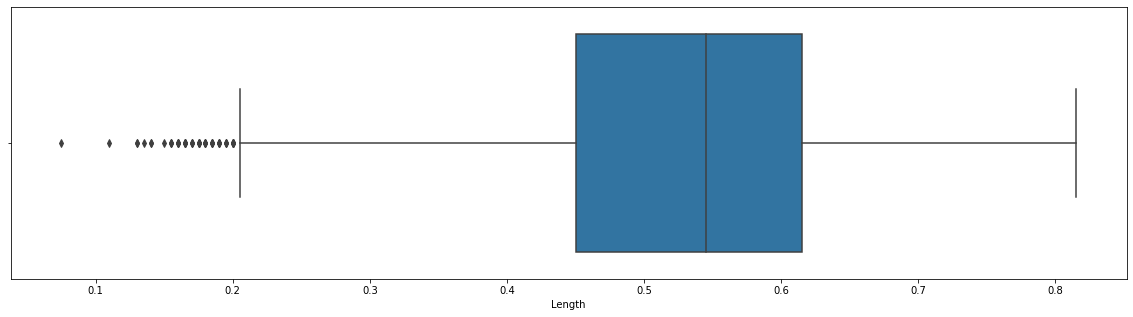

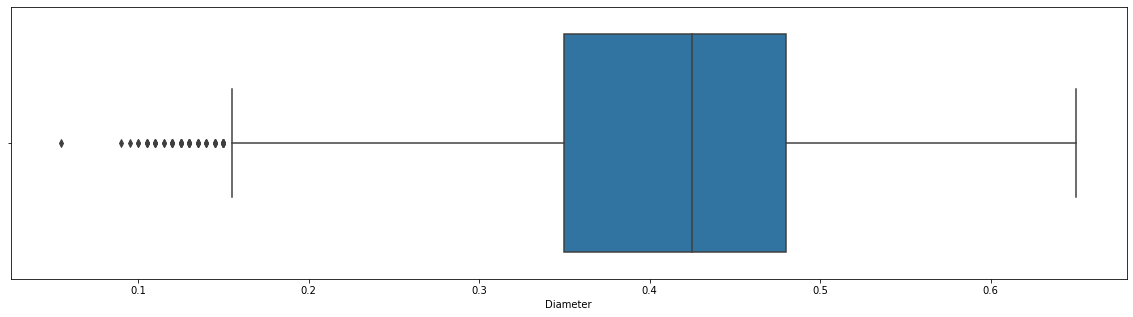

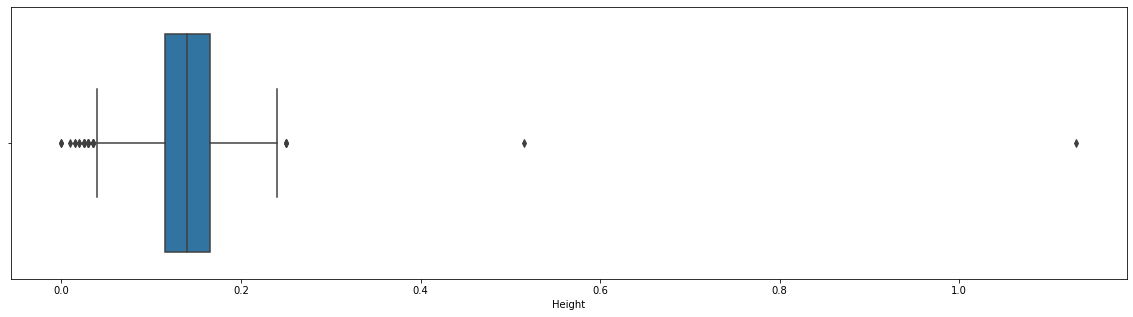

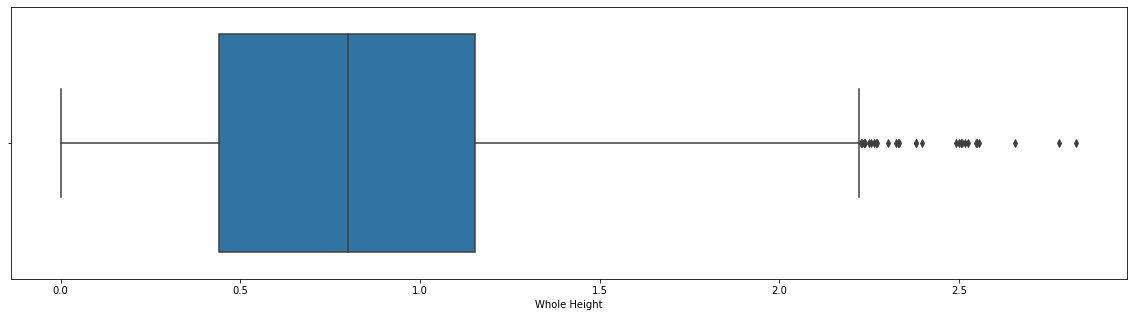

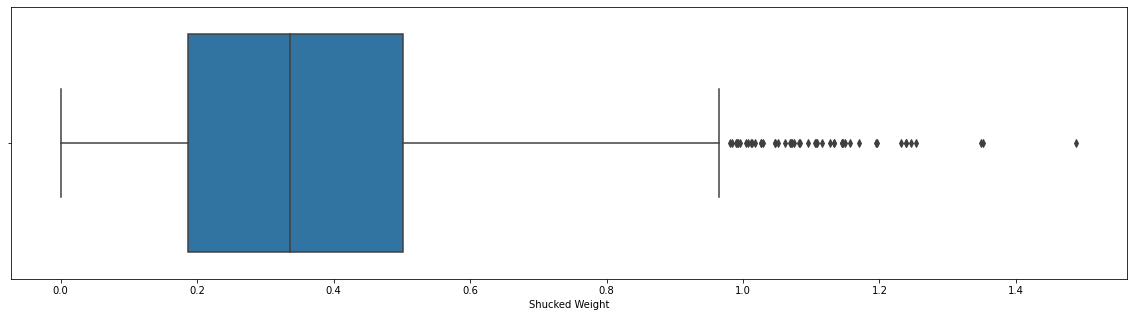

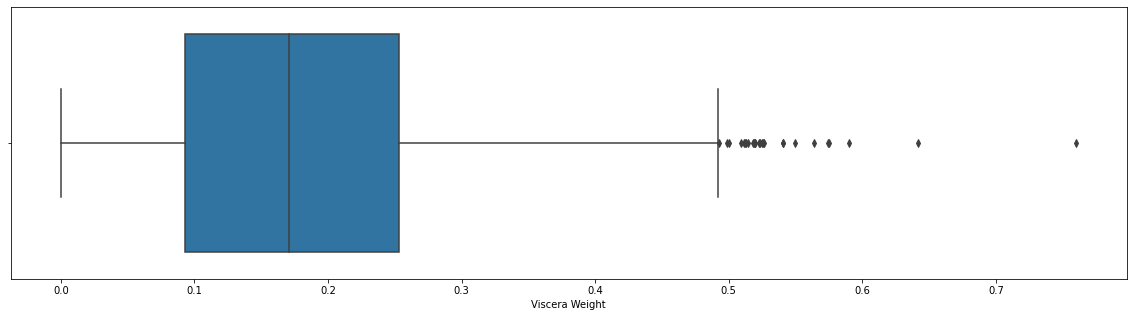

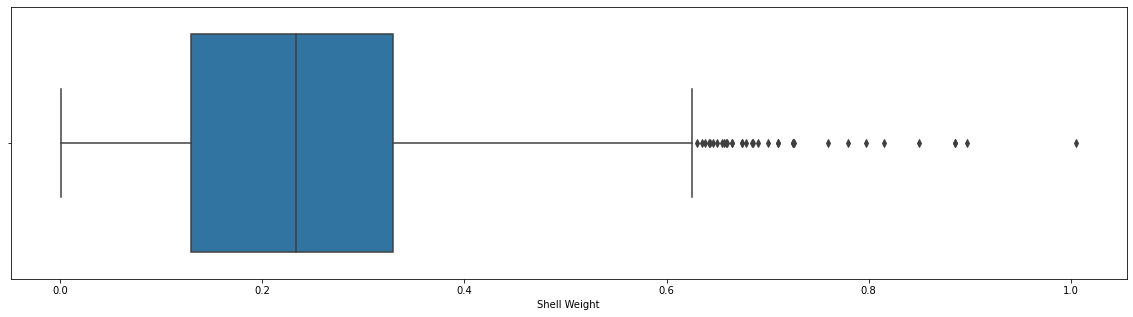

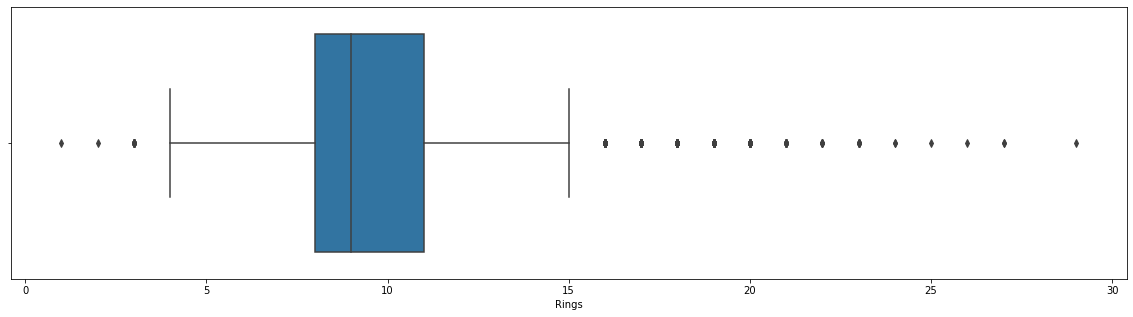

In [12]:
abalone_copy = abalone_replace.copy()
abalone_copy = abalone_copy.drop('Sex', axis=1)
for data in abalone_copy:
    plt.figure(figsize=(20, 5))
    sns.boxplot(abalone_copy[data])

As we can see from boxplots there are some outliers in the data. Lets find  outliers with using IQR method. After that we will replace outliers with the median value of corresponded column.

In [13]:
def detect_outliers_iqr(dataset):
    outliers = []
    dataset = sorted(dataset)
    q1,q3 = np.percentile(dataset, [25,75])
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    for elem in dataset:
        if elem < lower_fence or elem > upper_fence:
            outliers.append(elem)
    return outliers

In [14]:
sample_outliers = []
# We got 1, (len) because we don't want to look for outliers in categorical values.
for i in range(1, len(abalone_replace.count())):
    sample_outliers.append(detect_outliers_iqr(abalone_replace.iloc[:,i]))

In [15]:
def replace_outliers(data, sample_index):
    median = np.median(data)
    index = 0
    if len(sample_outliers[sample_index]) == 0: # returns if sample has no outlier
        return
    for (i, v) in data.iteritems():
        if sample_outliers[sample_index][index] == v:
            data[i] = median #replacing outlier with median value
            if index < len(sample_outliers[sample_index]) - 1:
                index +=1

In [16]:
abalone_trimmed = abalone_replace.copy() # We copy our dataframe and replace outliers on this new dataframe.
for i in range(1, len(sample_outliers)):
    replace_outliers(abalone_trimmed.iloc[:,i], i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
abalone_trimmed.head()

,Sex,Length,Diameter,Height,Whole Height,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [18]:
from sklearn.utils import shuffle
abalone_final = shuffle(abalone_trimmed)

In [19]:
#Split dataset into features and label
X = abalone_final.drop('Rings', axis=1)
y = abalone_final['Rings']

**Model Training with Machine learning techniques**

We will use several machine learning techniques such as Linear Regrression, KNN, Desicion trees and Bagging techniques like Random Forest. Lastly we will use boosting techiques like Adaboost and XGBoost(Extreme Gradient Boost) and see which approach gives best results. We will perform models evalution based on k-fold cross validation score.

In [20]:
from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xg

In [21]:
# Splitted dataset into 70% train 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [22]:
print("Number of train samples : ", X_train.shape[0])
print("Number of test samples :", X_test.shape[0])

Number of train samples :  2923
Number of test samples : 1253


**1. Linear Regression**

In [23]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Training score: ', regr.score(X_train, y_train))
print('Testing score:  ', regr.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

k = 7
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(regr , X_train, y_train, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Training score:  0.5364181860737636
Testing score:   0.529051034089608
Root Mean Squared Error: 2.123963154395885
Avg accuracy: 0.5210303461309416


**2. K Nearest Neighbour (KNN)**



In [24]:
neigh = KNeighborsRegressor(n_neighbors= 3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

print('Training score: ', neigh.score(X_train, y_train))
print('Testing score:  ', neigh.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

k = 7
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(neigh , X_train, y_train, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Training score:  0.74252392121235
Testing score:   0.43019208297628286
Root Mean Squared Error: 2.3362767889797533
Avg accuracy: 0.4680480092617569


In KNN approach when we select hyper parameter k as low values, we face with overfitting problem. 


In [25]:
neigh = KNeighborsRegressor(n_neighbors= 15)
neigh.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Training score: ', neigh.score(X_train, y_train))
print('Testing score:  ', neigh.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

k = 7
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(neigh , X_train, y_train, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Training score:  0.5987967376246641
Testing score:   0.5315644217989022
Root Mean Squared Error: 2.123963154395885
Avg accuracy: 0.5286229177164335


When we select k as a higher values, our model face with underfitting problem. However our models accuracy is higher than Linear Regression approach. 

**3. Desicion Trees**



In [26]:
desicion = DecisionTreeRegressor(random_state=0, max_depth=5, max_features = 0.5)
desicion.fit(X_train, y_train)
y_pred = desicion.predict(X_test)

print('Training score: ', desicion.score(X_train, y_train))
print('Testing score:  ', desicion.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(desicion , X_train, y_train, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Training score:  0.5180459024605746
Testing score:   0.4521718115548893
Root Mean Squared Error: 2.290773983967977
Avg accuracy: 0.4217855727979103


**4. Random Forest** 

In [27]:
rf_regr = RandomForestRegressor(n_estimators=100, max_features = 0.7, max_depth=6)
rf_regr.fit(X_train, y_train)
y_pred = rf_regr.predict(X_test)

print('Training score: ', rf_regr.score(X_train, y_train))
print('Testing score:  ', rf_regr.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

k = 7
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(rf_regr , X_train, y_train, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Training score:  0.644891134763252
Testing score:   0.5399585519926557
Root Mean Squared Error: 2.0992228044204304
Avg accuracy: 0.5435041497726715


**5. Ada Boost**

In [28]:
ada_regr = AdaBoostRegressor(random_state=0, n_estimators=50, learning_rate = 0.1)
ada_regr.fit(X_train, y_train)
y_pred = ada_regr.predict(X_test)

print('Training score: ', ada_regr.score(X_train, y_train))
print('Testing score:  ', ada_regr.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

k = 7
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(ada_regr , X_train, y_train, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Training score:  0.49879750163532655
Testing score:   0.43766164107952654
Root Mean Squared Error: 2.3209132573566267
Avg accuracy: 0.45762467676257806


**6. XGBoost**

In [29]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 50, learning_rate= 0.1)
xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)

print('Training score: ', xgb_r.score(X_train, y_train))
print('Testing score:  ', xgb_r.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(xgb_r , X_train, y_train, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Training score:  0.6128081306829221
Testing score:   0.5387165924398878
Root Mean Squared Error: 2.1020544977249576
Avg accuracy: 0.5399539951638859


When we examine the results, XGBoost and Random Forest algorithm give the best results. Also, linear regression and KNN algorithms perform well. Ada Boost and Desicion tree algorithms give the worst results of all.